In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root, fsolve
import scipy.special
import pandas as pd
import time

In [2]:
T_idle = 3
T_wait = 33
T_data = 30
T_rts = 3
T_cts = 3
T_ack = 3
T_bo = 3
T_out = 33

T_max = 12
Nr = 0
p_a = 1
nodes = 10

In [3]:
def Etc(p, p_f):
    if p_f == 1.:
        p_f = 0.9999999
    total_sum = 0
    for i in range(1, Nr + 1 + 1):
        first_addition = T_wait + T_bo / (1 - p_f)
        numerator = (i * T_max + 1) * (p_f ** (i * T_max + 1) - i * T_max * p_f - p_f + i * T_max)
        denominator = i * T_max * (1 - p_f ** (i * T_max + 1))
        second_addition = (1 - p) * (T_cts + T_data + T_ack)
        huge_sum = T_rts + p * T_out + first_addition * numerator / denominator + second_addition
        total_sum += p ** (i - 1) * huge_sum
    return T_idle + p_a * total_sum

In [4]:
def pi_idle(p, p_f):
    return T_idle / Etc(p, p_f)

def pi_rts(p, p_f):
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        numerator = p ** (i - 1) * p_a * T_rts
        denominator = Etc(p, p_f)
        total_sum += numerator / denominator
    return total_sum

def pi_out(p, p_f):
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        numerator = p ** (i - 1) * p_a * p * T_out
        denominator = Etc(p, p_f)
        total_sum += numerator / denominator
    return total_sum

def pi_cts(p, p_f):
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        numerator = (1 - p) * p ** (i - 1) * p_a * T_cts
        denominator = Etc(p, p_f)
        total_sum += numerator / denominator
    return total_sum

def pi_bo(p, p_f):
    if p_f == 1.:
        p_f = 0.9999999
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        numerator = p ** (i - 1) * p_a * T_bo * (i * T_max + 1) * (p_f ** (i * T_max + 1) - i * T_max * p_f - p_f + i * T_max)
        denominator = Etc(p, p_f) * (i * T_max) * (1 - p_f) * (1 - p_f ** (i * T_max + 1))
        total_sum += numerator / denominator
    return total_sum

def pi_bo2(p, p_f):
    if p_f == 1.:
        p_f = 0.9999999
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        dep_k = 0
        for k in range(1, i * T_max): 
            dep_k += 1 - p_f ** (i * T_max - k + 1)
        numerator = p ** (i - 1) * p_a * T_bo * (1 - i * T_max * p_f - p_f + i * T_max) * dep_k
        denominator = Etc(p, p_f) * (i * T_max) * (1 - p_f) * (1 - p_f ** (i * T_max + 1))
        total_sum += numerator / denominator
    return total_sum

def pi_wait(p, p_f):
    if p_f == 1.:
        p_f = 0.9999999
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        numerator = p ** (i - 1) * p_a * T_wait * (i * T_max + 1) * (p_f ** (i * T_max + 1) - i * T_max * p_f - p_f + i * T_max)
        denominator = Etc(p, p_f) * (i * T_max) * (1 - p_f ** (i * T_max + 1))
        total_sum += numerator / denominator
    return total_sum

def pi_data(p, p_f):
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        numerator = (1 - p) * p ** (i - 1) * p_a * T_data
        denominator = Etc(p, p_f)
        total_sum += numerator / denominator
    return total_sum

def pi_ack(p, p_f):
    total_sum = 0
    for i in range(1, Nr + 1 + 1): 
        numerator = (1 - p) * p ** (i - 1) * p_a * T_ack
        denominator = Etc(p, p_f)
        total_sum += numerator / denominator
    return total_sum

def pic_bo(p, p_f, i, k):
    if p_f == 1.:
        p_f = 0.9999999
    numerator = (1 - p_f ** (i * T_max - k + 1)) * (1 - i * T_max * p_f - p_f + i * T_max)
    denominator = (i * T_max) * (1 - p_f) * (1 - p_f ** (i * T_max + 1))
    
    return p_a * p ** (i - 1) * (T_bo / Etc(p, p_f)) * (numerator / denominator)

def p_mac(p, p_f):
    total_sum = 0
    for i in range(1, Nr + 1 + 1):
        total_sum += (1 - p) * p ** (i - 1) * p_a
#     return total_sum
    return (1 - pi_rts(p, p_f)) ** (nodes - 1) * total_sum


def p_mac(p, p_f):
    return 1 - p ** (Nr + 1)

In [5]:
pi_bo(simpc, simpf) * Etc(simpc, simpf)

NameError: name 'simpc' is not defined

In [6]:
p_1001[24], pf_1001[24]

NameError: name 'p_1001' is not defined

In [7]:
Etc(0, 1)

61.49554947597886

In [8]:
pi_bo(0.7077, 0.8118)

0.22247775733804873

In [9]:
s = 0
for i in range(1, Nr+2):
#     for j in range(1, i*T_max+1):
    s += pc_bo(0.7077, 0.8118, i, 1)
s

NameError: name 'pc_bo' is not defined

In [10]:
pi_wait(0.7077, 0.8118)

0.46057345324122845

In [11]:
def pat_d_bo(p, p_f):
    total_sum = 0
    for k in range(1, Nr + 1 + 1):
        for i in range(1, k * T_max + 1):
            numerator = (k * T_max + 1) * (1 - p_f ** (k * T_max + 1 - i))
            denominator = (k * T_max) * (1 - p_f ** (k * T_max + 1))
            total_sum += p_a * p ** (k-1) * numerator / denominator * T_bo
    return total_sum

def pat_d_wait(p, p_f):
    total_sum = 0
    for k in range(1, Nr + 1 + 1):
        numerator1 = k * T_max + 1
        denominator1 = k * T_max
        numerator2 = (k * T_max + 1) * (1 - p_f)
        denominator2 = 1 - p_f ** (k * T_max + 1)
        total_sum += p_a * p ** (k-1) * numerator1 / denominator1 * (numerator2 / denominator2 - 1) * T_wait
    return total_sum

def pat_d_rts(p, p_f):
    return p_a * (1 - p ** (Nr + 1)) / (1 - p) * T_rts

def pat_d_out(p, p_f):
    return p_a * p * (1 - p ** (Nr + 1)) / (1 - p) * T_out

def pat_d_data(p, p_f):
    return p_a * (1 - p ** (Nr + 1)) * T_data

def pat_d_cts(p, p_f):
    return p_a * (1 - p ** (Nr + 1)) * T_cts

def pat_d_ack(p, p_f):
    return p_a * (1 - p ** (Nr + 1)) * T_ack

def pat_d(p, p_f):
    if p_f == 1.:
        p_f = 0.9999999
    p1 = T_idle + pat_d_bo(p, p_f) + pat_d_wait(p, p_f) + pat_d_rts(p, p_f)
    p2 = pat_d_out(p, p_f) + pat_d_data(p, p_f) + pat_d_cts(p, p_f) + pat_d_ack(p, p_f)
    return p1 + p2

In [12]:
c_p = 0.3
c_pf = 0.95
Etc(c_p, c_pf), pat_d(c_p, c_pf)

(74.91577556840998, 74.91577556840986)

In [13]:
pi_rts(c_p, c_pf), pat_d_rts(c_p, c_pf) / pat_d(c_p, c_pf)

(0.040044970198039584, 0.04004497019803965)

In [38]:
def tr_eq_p(p, p_f, n, t):
    p_rts = pi_rts(p, p_f)
    p_cts = pi_cts(p, p_f)
    p_data = pi_data(p, p_f)
    p_ack = pi_ack(p, p_f)
    p_wait = pi_wait(p, p_f)
    pc_bo = 0
    for i in range(1, Nr + 1 + 1) :
        pc_bo += pic_bo(p, p_f, i, 1)
    
    if t == 1:
        return p - (1 - (1 - p_rts) ** (n-1))
    elif t == 0:
        return p - (1 - (1 - p_rts) ** (n-1)) - (1 - (1 - p_cts) ** (n-1)) - (1 - (1 - p_data) ** (n-1))
    elif t == 10:
        return p - (1 - (1 - p_rts) ** (n-1)) - (1 - (1 - p_cts) ** (n-1)) - p_wait * (1 - (1 - p_ack) ** (n-1))
    elif t == 100:
        return p - (1 - (1 - p_rts) ** (n-1)) - (1 - (1 - p_cts) ** (n-1)) - (1 - (1 - p_ack) ** (n-1)) 
    elif t == 110:
        return p - (1 - (1 - p_rts) ** (n-1)) - (1 - (1 - p_cts) ** (n-1)) - (1 - (1 - p_data) ** (n-1))  - (1 - (1 - p_ack) ** (n-1)) 
    elif t == 101:
        return p - (1 - (1 - p_rts) ** (n-1)) - (1 - (1 - p_cts) ** (n-1)) - p_wait * (1 - (1 - p_data) ** (n-1)) - p_wait * (1 - (1 - p_ack) ** (n-1))
    elif t == 9:
        return p - ((1 - (1 - p_rts) ** (n-1)) * (1 - (1 - p_cts) ** (n-1)))
    elif t == 8:
        return p - (1 - (1 - p_rts - p_cts) ** (n-1))
    elif t == 11:
        return p - (1 - (1 - p_rts - p_cts - p_data) ** (n-1))
    elif t == 111:
        return p - (1 - (1 - p_rts) ** (n-1)) - (1 - p_rts) ** (n-1) * (1 - (1 - p_cts) ** (n-1))
    elif t == 12:
        return p - p_rts * ((1 - (1 - p_rts) ** (n-1)) + (1 - (1 - p_cts) ** (n-1)))
    elif t == 13:
        return p - ((1 - (1 - p_rts) ** (n-1)) + (1 - (1 - p_cts) ** (n-1)))
    elif t == 5:
        return p - (1 - (1 - p_rts - p_cts) ** (n-1))
    elif t == 6:
        return p - (1 - ((1 - p_rts) * (1 - p_cts)) ** (n-1))
    elif t == 7:
        return p - (1 - ((1 - p_rts) * (1 - p_cts) * (1 - p_data)) ** (n-1))


def tr_eq_pf(p, p_f, n, t):
    p_rts = pi_rts(p, p_f)
    p_cts = pi_cts(p, p_f)
    p_data = pi_data(p, p_f)
    p_ack = pi_ack(p, p_f)
    if t == 1:
        return p_f - (1 - p_cts) ** (n-1)
    elif t == 2:
        return p_f - (1 - p_rts - p_cts) ** (n-1)
    elif t == 3:
        return p_f - ((1 - p_rts) * (1 - p_cts)) ** (n-1)
    elif t == 4:
        return p_f - ((1 - p_rts) * (1 - p_cts) * (1 - p_data)) ** (n-1)

#     return p_f - (1 - p_cts) ** (n-1)

def system(p_pf, n, i, j):
    p, pf = p_pf
    return (tr_eq_p(p, pf, n, i), tr_eq_pf(p, pf, n, j))

def calculate_transcendental_equation(i, j):
    p_array = []
    pf_array = []
    for node in range(1, nodes+1):
        p, pf = fsolve(system, (0., 0.), args=(node, i, j))
        p_array.append(p)
        pf_array.append(pf)
    return p_array, pf_array

In [39]:
p_arr, p_f_arr = calculate_transcendental_equation(11, 1)

In [40]:
p_arr

[0.0,
 0.355653059428517,
 0.4805145769749113,
 0.5544108558115733,
 0.6056437905672427,
 0.644200209551867,
 0.6747337833222509,
 0.6997745912625958,
 0.7208429813619511,
 0.7389195927447432]

In [41]:
p_f_arr

[1.0,
 0.9716655335710175,
 0.9572564133212409,
 0.9474453595107554,
 0.9400627295711595,
 0.9342036506638471,
 0.9293967559447561,
 0.925363256868754,
 0.921923867781973,
 0.9189561856057168]

In [46]:
nnn = 10
((1 - (1 - pi_rts(p_arr[nnn-1], p_f_arr[nnn-1])) ** (nnn-1)),
 (1 - (1 - pi_cts(p_arr[nnn-1], p_f_arr[nnn-1])) ** (nnn-1)),
 (1 - (1 - pi_data(p_arr[nnn-1], p_f_arr[nnn-1])) ** (nnn-1)))

(0.2797186010535633, 0.08104381437026764, 0.5865261142138642)

In [47]:
(p_arr[nnn-1], 
 (1 - (1 - pi_rts(p_arr[nnn-1], p_f_arr[nnn-1]) - 
           pi_cts(p_arr[nnn-1], p_f_arr[nnn-1]) - 
           pi_data(p_arr[nnn-1], p_f_arr[nnn-1])
      ) ** (nnn-1)))



(0.7389195927447432, 0.738919592650515)

### P rts-rts:    0.3320225487056603
### P rts-cts:   0.14595563795862562
### P rts-data: 0.029382408630126266

In [66]:
cccp = 0.5073605952944122
ccpf = 0.7944531640577899
cccrts = pi_rts(cccp, ccpf)
ccccts = pi_cts(cccp, ccpf)
ccdata = pi_data(cccp, ccpf)


((1 - (1 -  cccrts) ** (nnn-1)),
 (1 - (1 -  ccccts) ** (nnn-1)),
 (1 - (1 - ccdata / 10) ** (nnn-1)))

(0.18438568752440787, 0.09500866745183045, 0.09500866745183045)

In [62]:
1 - (1 -  cccrts) ** (2*nnn-1)

0.34966869754056273

In [63]:
1 - (1 -  ccccts) ** (2*nnn-1)

0.19002511483014128

In [64]:
1 - (1 -  ccdata) ** (2*nnn-1)

0.8914717439725509

In [65]:
cccrts, ccccts, ccdata

(0.022391470614808607, 0.011030920754161974, 0.11030920754161973)

In [113]:
dd = np.random.uniform(0, 1, size=10000000)
# have_data = True if dd <= 1.0 else False

In [114]:
len(dd), len(dd[dd<=1.0])

(10000000, 10000000)

In [28]:
((1 - (1 -  pi_rts(cccp, ccpf)) ** (nnn-1)) +
 (1 - (1 -  pi_cts(cccp, ccpf)) ** (nnn-1)) +
 (1 - (1 - pi_data(cccp, ccpf)) ** (nnn-1)))

0.9301319307407772

In [50]:
((1 - (1 -  pi_rts(cccp, ccpf) - pi_cts(cccp, ccpf) - pi_data(cccp, ccpf)) ** (nnn-1)))

0.7525489746231562

In [ ]:
for i in range(1, nodes+1):
    st = f"Node: {i if i >= 10 else '0' + str(i)}, "
    st += f"p_success = {np.round(1 - p_arr[i-1]**(Nr+1), 6)}, "
    st += f"p_fail = {np.round(p_arr[i-1]**(Nr+1), 6)}, "
    st += f"p_coll = {np.round(p_arr[i-1], 6)}, "
    st += f"p_free = {np.round(p_f_arr[i-1], 6)}, "
    st += f"E_tc = {Etc(p_arr[i-1], p_f_arr[i-1])}"
    print(st)


In [ ]:
p_mac = []
for n in range(nodes):
    p_mac_cur = 0
    for i in range(1, Nr + 1 + 1):
        p_mac_cur += (1 - p_arr[n]) * p_arr[n]**(i-1) * p_a
    p_mac.append(p_mac_cur)

In [ ]:
p_coll_Alex = [
    0, 0.203819802, 0.278316812, 0.329999544, 0.373494826, 0.406361913, 0.447571555, 
    0.474062412, 0.499352583, 0.529355956, 0.545614959, 0.564125611, 0.58776428, 
    0.611609414, 0.620782611, 0.637620351, 0.650843229, 0.662834418, 0.684104257, 
    0.695411533, 0.705713411, 0.719073499, 0.729992368, 0.742490864, 0.750022859
]

p_mac_Alex = [
    1, 0.998737088, 0.995771934, 0.993230762, 0.987050262, 0.979169828, 0.970036699, 
    0.962036754, 0.9507881, 0.934864673, 0.929895174, 0.915157445, 0.901621062, 
    0.880621238, 0.871235324, 0.852673415, 0.844376245, 0.82771842, 0.801905546, 
    0.784835224, 0.772811502, 0.750357315, 0.733335654, 0.715813717, 0.700123937
]

In [ ]:
p_orig, pf_orig = calculate_transcendental_equation(0, 1)


In [ ]:
p_orig, pf_orig = calculate_transcendental_equation(0, 1)

# p_52 = calculate_transcendental_equation(5, 2)[0]
# p_53 = calculate_transcendental_equation(5, 3)[0]
# p_54 = calculate_transcendental_equation(5, 4)[0]

# p_62 = calculate_transcendental_equation(6, 2)[0]
# p_63 = calculate_transcendental_equation(6, 3)[0]
# p_64 = calculate_transcendental_equation(6, 4)[0]

# p_72 = calculate_transcendental_equation(7, 2)[0]
# p_73 = calculate_transcendental_equation(7, 3)[0]
# p_74 = calculate_transcendental_equation(7, 4)[0]

# p_12 = calculate_transcendental_equation(1, 2)[0]
# p_13 = calculate_transcendental_equation(1, 3)[0]
# p_14 = calculate_transcendental_equation(1, 4)[0]

# p_82 = calculate_transcendental_equation(8, 2)[0]
# p_83 = calculate_transcendental_equation(8, 3)[0]
# p_84 = calculate_transcendental_equation(8, 4)[0]

p_111 = calculate_transcendental_equation(11, 1)[0]
p_112 = calculate_transcendental_equation(11, 2)[0]

p_121, pf_121 = calculate_transcendental_equation(12, 1)
p_101, pf_101 = calculate_transcendental_equation(10, 1)
p_1001, pf_1001 = calculate_transcendental_equation(100, 1)
p_1101, pf_1101 = calculate_transcendental_equation(110, 1)
p_1011, pf_1011 = calculate_transcendental_equation(101, 1)

In [ ]:
# p_22 = calculate_transcendental_equation()[0]

In [ ]:
# p_23 = calculate_transcendental_equation()[0]

In [ ]:
# p_24 = calculate_transcendental_equation()[0]

In [ ]:
analytics_headers = [
    'nodes',
    'p_coll_original',
    'p_coll Alex',
    'p_coll Emil',
    'p_coll 10 1',
    'p_coll 100 1',
    'p_s_original',
    'p_s Alex',
    'p_s Emil',
    'p_s 10 1',
    'p_s 100 1',
]

data_an = [analytics_headers]
for i in range(nodes):
    data_an.append([
        i + 1,
        p_orig[i],
        p_coll_Alex[i],
        p_c_sim[i],
        p_101[i],
        p_1011[i],
        p_mac(p_orig[i], pf_orig[i]),
        p_mac_Alex[i],
        p_s_sim[i],
        p_mac(p_101[i], pf_101[i]),
        p_mac(p_1001[i], pf_1001[i]),
    ])
    
data_pd = {}
for i in range(1, len(data_an[0])):
    data_pd[data_an[0][i]] = np.array(data_an[1:]).T[i]
df1 = pd.DataFrame(data_pd, index=np.arange(1, len(np.array(data_an[1:]).T[0])+1))
df1

In [ ]:
1 - 0.807312 ** 4

In [ ]:
plt.figure(dpi=250)
plt.plot(np.arange(1, 26), p_orig, label='Formula (4)')
plt.plot(np.arange(1, 26), p_1101, label='Formula (6)')
# plt.plot(np.arange(1, 26), p_coll_Alex, label='Simulator Alexey')
plt.plot(np.arange(1, 26), p_c_sim, label='Simulator Emil')
# plt.plot(np.arange(1, 26), p_12, label='p 2.1, pf 2.2')
# plt.plot(np.arange(1, 26), p_13, label='p 2.1, pf 2.3')
# plt.plot(np.arange(1, 26), p_14, label='p 2.1, pf 2.4')
# plt.plot(np.arange(1, 26), p_52, label='p 2.5, pf 2.2')
# plt.plot(np.arange(1, 26), p_53, label='p 2.5, pf 2.3')
# plt.plot(np.arange(1, 26), p_54, label='p 2.5, pf 2.4')
# plt.plot(np.arange(1, 26), p_62, label='p 2.6, pf 2.2')
# plt.plot(np.arange(1, 26), p_63, label='p 2.6, pf 2.3')
# plt.plot(np.arange(1, 26), p_64, label='p 2.6, pf 2.4')
# plt.plot(np.arange(1, 26), p_72, label='p 2.7, pf 2.2')
# plt.plot(np.arange(1, 26), p_73, label='p 2.7, pf 2.3')
# plt.plot(np.arange(1, 26), p_74, label='p 2.7, pf 2.4')
# plt.plot(np.arange(1, 26), p_82, label='вфы, pf 2.2')
# plt.plot(np.arange(1, 26), p_83, label='вфы, pf 2.3')
# plt.plot(np.arange(1, 26), p_84, label='вфы, pf 2.4')
# plt.plot(np.arange(1, 26), p_1011, label='p 2.15, pf 2.13')
# plt.plot(np.arange(1, 26), p_131, label='вфы, pf 2.4')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=4)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('p{collision}')
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

In [ ]:
p_mac_orig = []
p_fail_orig = []
for i in range(nodes):
    p_mac_orig.append(p_mac(p_orig[i], pf_orig[i]))
    p_fail_orig.append(1 - p_mac(p_orig[i], pf_orig[i])) 

In [ ]:
p_mac_1101 = []
p_fail_1101 = []
for i in range(nodes):
    p_mac_1101.append(p_mac(p_1101[i], pf_1101[i]))
    p_fail_1101.append(1 - p_mac(p_1101[i], pf_1101[i]))  

In [ ]:
etc_orig = []
etc_sim1 = []
for i in range(nodes):
    etc_orig.append(Etc(p_orig[i], pf_orig[i]))
    etc_sim1.append(Etc(p_c_sim[i], p_f_sim[i]))

In [ ]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), etc_orig, label='Analytic Original')
plt.plot(np.arange(1, nodes + 1), etc_sim1, label='Analytic with p,pf from sim')
plt.plot(np.arange(1, nodes + 1), etc_sim, label='Simulator')
# plt.plot(np.arange(1, 26), p_coll_Alex, label='Simulator Alexey')
# plt.plot(np.arange(1, 26), p_12, label='p 2.1, pf 2.2')
# plt.plot(np.arange(1, 26), p_13, label='p 2.1, pf 2.3')
# plt.plot(np.arange(1, 26), p_14, label='p 2.1, pf 2.4')
# plt.plot(np.arange(1, 26), p_52, label='p 2.5, pf 2.2')
# plt.plot(np.arange(1, 26), p_53, label='p 2.5, pf 2.3')
# plt.plot(np.arange(1, 26), p_54, label='p 2.5, pf 2.4')
# plt.plot(np.arange(1, 26), p_62, label='p 2.6, pf 2.2')
# plt.plot(np.arange(1, 26), p_63, label='p 2.6, pf 2.3')
# plt.plot(np.arange(1, 26), p_64, label='p 2.6, pf 2.4')
# plt.plot(np.arange(1, 26), p_72, label='p 2.7, pf 2.2')
# plt.plot(np.arange(1, 26), p_73, label='p 2.7, pf 2.3')
# plt.plot(np.arange(1, 26), p_74, label='p 2.7, pf 2.4')
# plt.plot(np.arange(1, 26), p_82, label='вфы, pf 2.2')
# plt.plot(np.arange(1, 26), p_83, label='вфы, pf 2.3')
# plt.plot(np.arange(1, 26), p_84, label='вфы, pf 2.4')
# plt.plot(np.arange(1, 26), p_1011, label='p 2.15, pf 2.13')
# plt.plot(np.arange(1, 26), p_131, label='вфы, pf 2.4')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=4)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('p{collision}')
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

In [ ]:
# plt.figure(dpi=250)
# plt.plot(np.arange(1, 26), p_mac_orig, label='p{mac} with p from (4)')
# plt.plot(np.arange(1, 26), p_mac_1101, label='p{mac} with p from (6)')
# # plt.plot(np.arange(1, 26), p_mac_Alex, label='Simulator Alexey')
# plt.plot(np.arange(1, 26), p_s_sim, label='Simulator Emil')
# # plt.plot(np.arange(1, 26), p_12, label='p 2.1, pf 2.2')
# # plt.plot(np.arange(1, 26), p_13, label='p 2.1, pf 2.3')
# # plt.plot(np.arange(1, 26), p_14, label='p 2.1, pf 2.4')
# # plt.plot(np.arange(1, 26), p_52, label='p 2.5, pf 2.2')
# # plt.plot(np.arange(1, 26), p_53, label='p 2.5, pf 2.3')
# # plt.plot(np.arange(1, 26), p_54, label='p 2.5, pf 2.4')
# # plt.plot(np.arange(1, 26), p_62, label='p 2.6, pf 2.2')
# # plt.plot(np.arange(1, 26), p_63, label='p 2.6, pf 2.3')
# # plt.plot(np.arange(1, 26), p_64, label='p 2.6, pf 2.4')
# # plt.plot(np.arange(1, 26), p_72, label='p 2.7, pf 2.2')
# # plt.plot(np.arange(1, 26), p_73, label='p 2.7, pf 2.3')
# # plt.plot(np.arange(1, 26), p_74, label='p 2.7, pf 2.4')
# # plt.plot(np.arange(1, 26), p_82, label='вфы, pf 2.2')
# # plt.plot(np.arange(1, 26), p_83, label='вфы, pf 2.3')
# # plt.plot(np.arange(1, 26), p_84, label='вфы, pf 2.4')
# # plt.plot(np.arange(1, 26), p_131, label='вфы, pf 2.4')
# plt.legend(bbox_to_anchor=(1.05, 1, 0.4, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
# plt.legend(loc=3)
# plt.grid(alpha=0.2)
# plt.xlabel('Nodes')
# plt.ylabel('p{mac}')
# plt.tight_layout()
# # plt.savefig('tests.png', dpi=600)
# plt.show()

In [ ]:
p_t, pf_t = calculate_transcendental_equation(12, 1)

for i in range(25):
    print(pi_rts(p_t[i], pf_t[i]))


In [ ]:
1 - np.array(p_arr) ** (Nr+1)

In [ ]:
analytics_headers = [
    'nodes',
    'p_collision',
    'p_success',
    'p_failure',
    'p_free',
    'cycle_time',
]

data_an = [analytics_headers]
for i in range(nodes):
    data_an.append([
        i + 1,
        p_arr[i],
        1 - p_arr[i]**(Nr+1),
        p_arr[i]**(Nr+1),
        p_f_arr[i],
        Etc(p_arr[i], p_f_arr[i]),
    ])
 

In [ ]:
data_pd = {}
for i in range(1, len(data_an[0])):
    data_pd[data_an[0][i]] = np.array(data_an[1:]).T[i]
df1 = pd.DataFrame(data_pd, index=np.arange(1, len(np.array(data_an[1:]).T[0])+1))
df1

In [ ]:
 
with open('results/csv/Sara_analytics_results.csv', "wt", newline="") as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(analytics_headers)
    for i in range(1, len(data_an)):
        writer.writerow(data_an[i])

In [15]:
threads = 6

name = '2021_02_21_02'
fullname = 'results/npy/' + name
tt = np.load(fullname + '_0.npy')
for th in range(1, threads):
    ct = np.load(fullname + f'_{th}.npy')
    tt = np.concatenate((tt, ct))

In [16]:
p_c_sim = tt.T[1]
p_c_sim

array([0.        , 0.18358663, 0.26199568, 0.31816749, 0.36409836,
       0.39921624, 0.43164496, 0.459873  , 0.48570718, 0.50948882])

In [17]:
p_f_sim = tt.T[4]
p_f_sim

array([1.        , 0.92970402, 0.89768261, 0.87319396, 0.85415213,
       0.837633  , 0.82455714, 0.81326424, 0.8033719 , 0.79460802])

In [18]:
etc_sim = tt.T[6]
etc_sim

array([ 61.486749  , 117.10796107, 160.06449986, 202.88350668,
       243.66562682, 282.9731978 , 321.49507811, 358.31479034,
       393.83624818, 427.89690515])

In [19]:
bo_sim = tt.T[8]
rts_sim = tt.T[9]
cts_sim = tt.T[10]
data_sim = tt.T[11]
out_sim = tt.T[13]
wait_sim = tt.T[14]

In [20]:
etc_sim1 = []
for i in range(nodes):
    etc_sim1.append(Etc(p_c_sim[i], p_f_sim[i]))

In [21]:
p_orig, pf_orig = calculate_transcendental_equation(0, 1)
etc_orig = []
for i in range(nodes):
    etc_orig.append(Etc(p_orig[i], pf_orig[i]))

In [22]:
p_c_sara = []
p_f_sara = []
etc_sara = []
bo_sara = []
rts_sara = []
cts_sara = []
data_sara = []
out_sara = []
wait_sara = []
with open('Results_N=10.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for row in list(reader)[1:]:
        print(row)
        p_c_sara.append(float(row[2]))
        p_f_sara.append(float(row[5]))
        etc_sara.append(float(row[3]))
        bo_sara.append(float(row[10]))
        rts_sara.append(float(row[11]))
        cts_sara.append(float(row[12]))
        data_sara.append(float(row[13]))
        out_sara.append(float(row[15]))
        wait_sara.append(float(row[16]))

['1', '1.000000', '0.000000', '61.522931', '0.000000', '1.000000', '0.000000', '1.000000', '0.000000', '3.002051', '19.520880', '3.000000', '3.000000', '30.000000', '3.000000', '0.000000', '0.000000']
['2', '0.998389', '0.186407', '107.901852', '0.000000', '0.930086', '0.069914', '0.998814', '0.001186', '3.003921', '28.903417', '3.682222', '2.996443', '29.964428', '2.996443', '7.543574', '28.811405']
['3', '0.993818', '0.262840', '147.622092', '0.000000', '0.897665', '0.102335', '0.974910', '0.025090', '3.005350', '34.635943', '4.046462', '2.983590', '29.835900', '2.983590', '11.691587', '58.439672']
['4', '0.987331', '0.320716', '191.656751', '0.000000', '0.873982', '0.126018', '0.960204', '0.039796', '3.006795', '39.807984', '4.363363', '2.965065', '29.650655', '2.965065', '15.381274', '93.516549']
['5', '0.981549', '0.364257', '235.184414', '0.000000', '0.854728', '0.145272', '0.948608', '0.051392', '3.008177', '44.148502', '4.635292', '2.948812', '29.488118', '2.948812', '18.551283

In [23]:
etc_sim2 = []
for i in range(nodes):
    etc_sim2.append(Etc(p_c_sara[i], p_f_sara[i]))

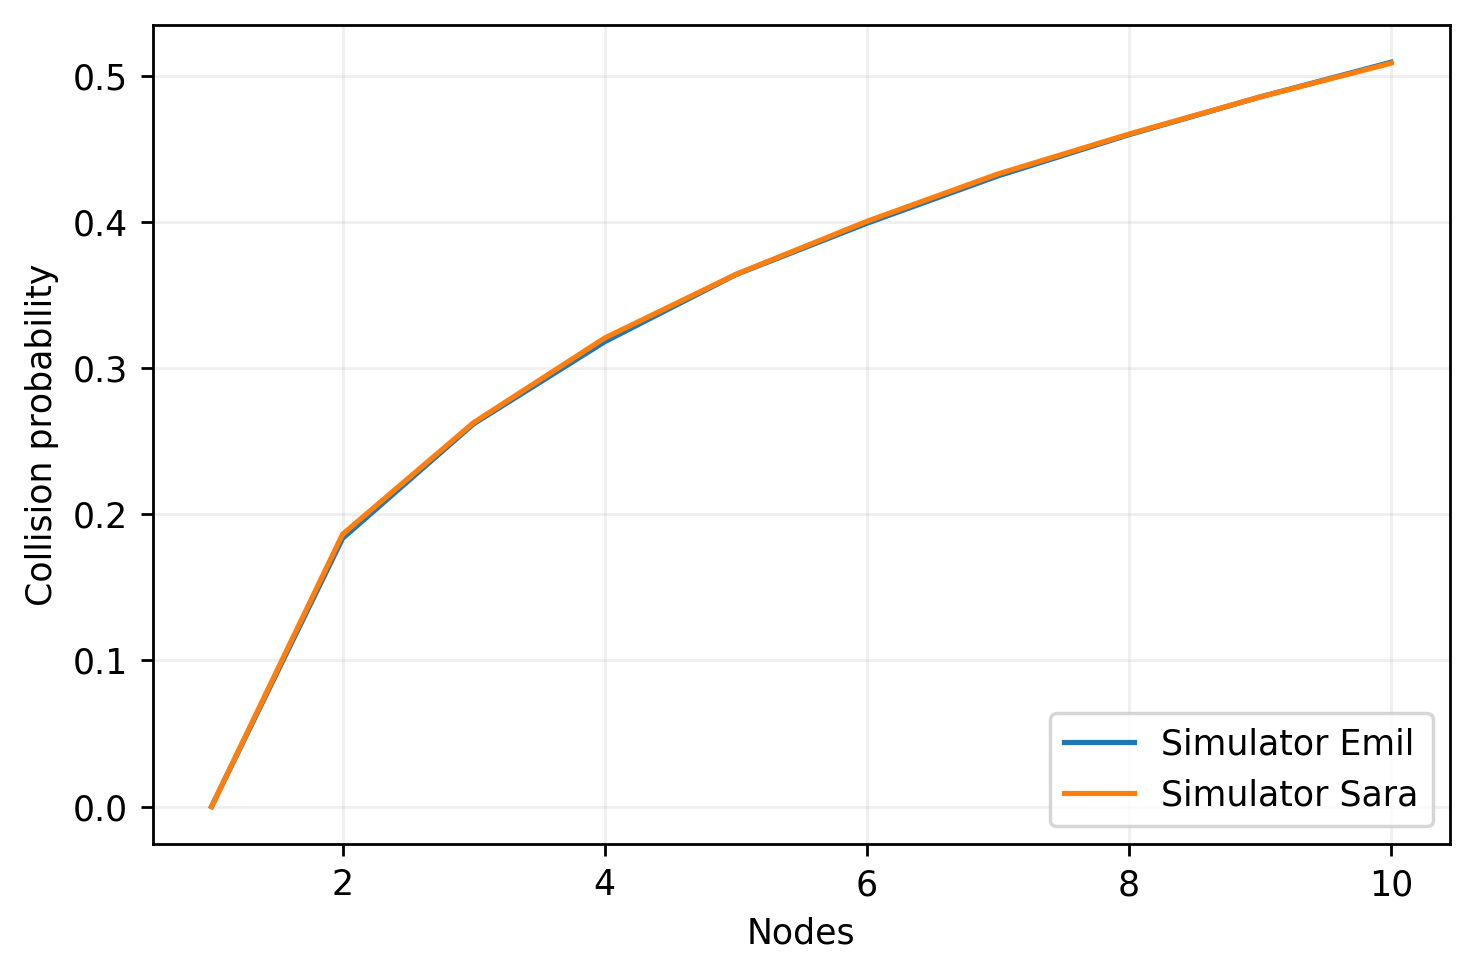

In [24]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), p_c_sim, label='Simulator Emil')
plt.plot(np.arange(1, nodes + 1), p_c_sara, label='Simulator Sara')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=4)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('Collision probability')
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

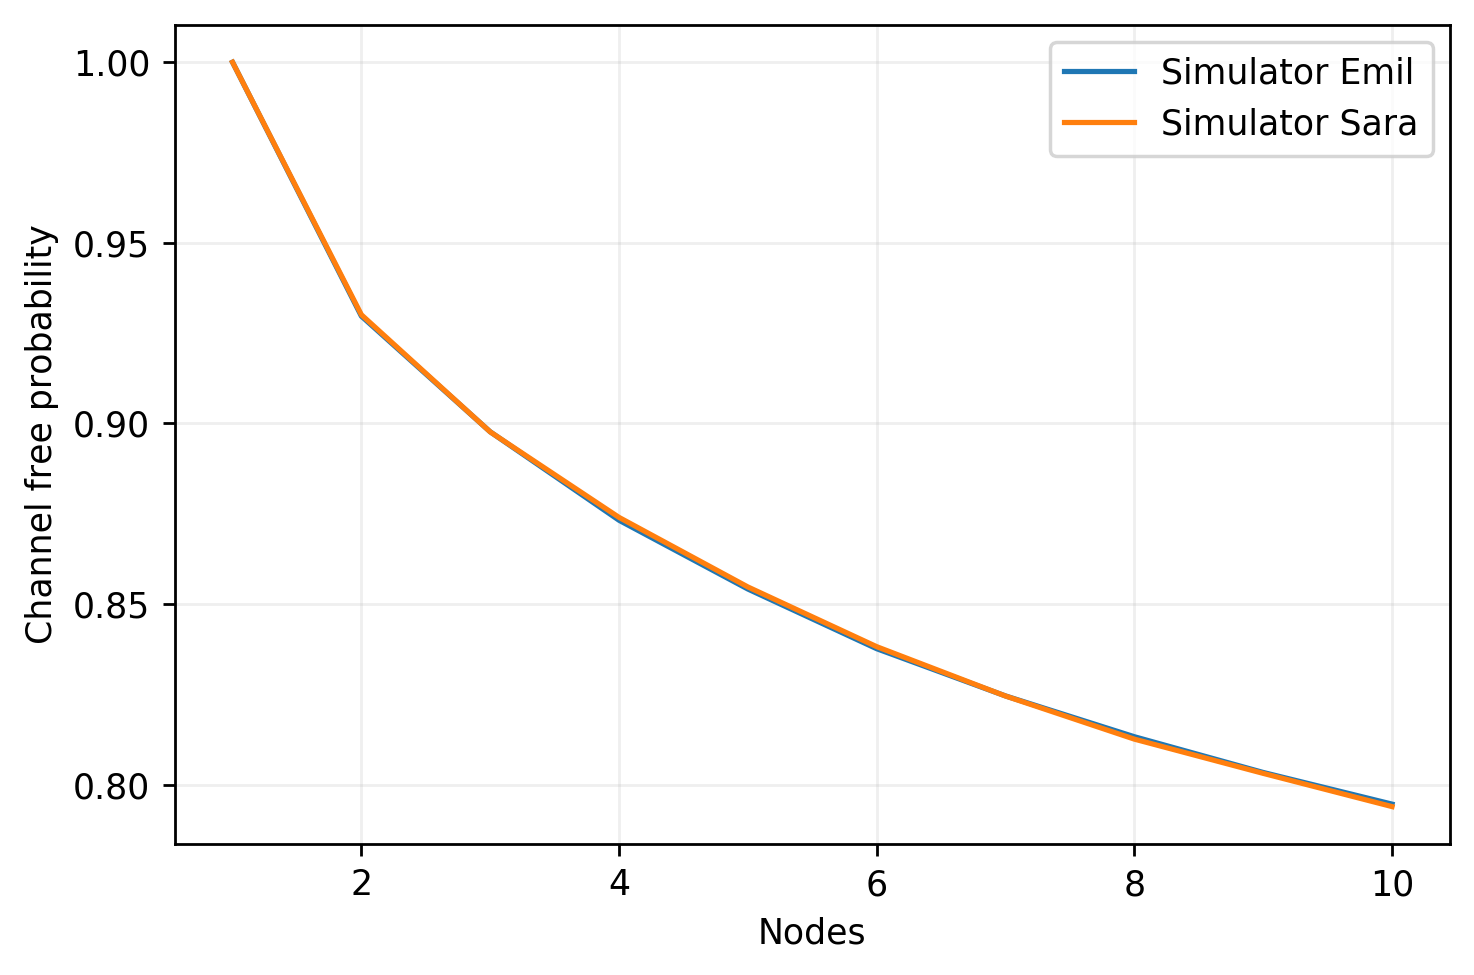

In [25]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), p_f_sim, label='Simulator Emil')
plt.plot(np.arange(1, nodes + 1), p_f_sara, label='Simulator Sara')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=1)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('Channel free probability')
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

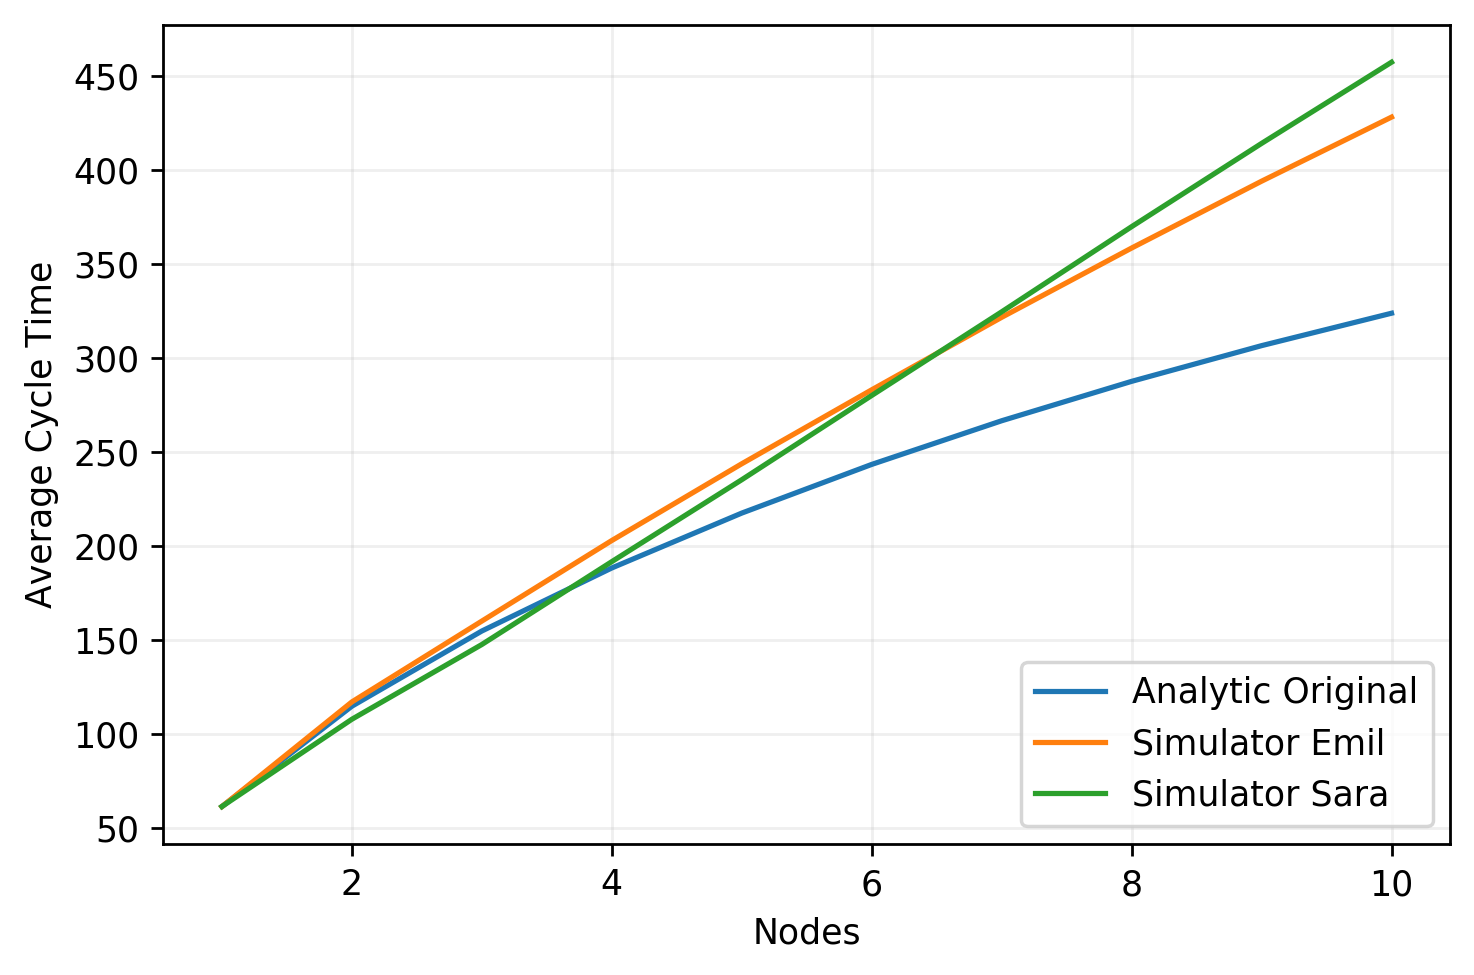

In [26]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), etc_orig, label='Analytic Original')
plt.plot(np.arange(1, nodes + 1), etc_sim, label='Simulator Emil')
plt.plot(np.arange(1, nodes + 1), etc_sara, label='Simulator Sara')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=4)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('Average Cycle Time')
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

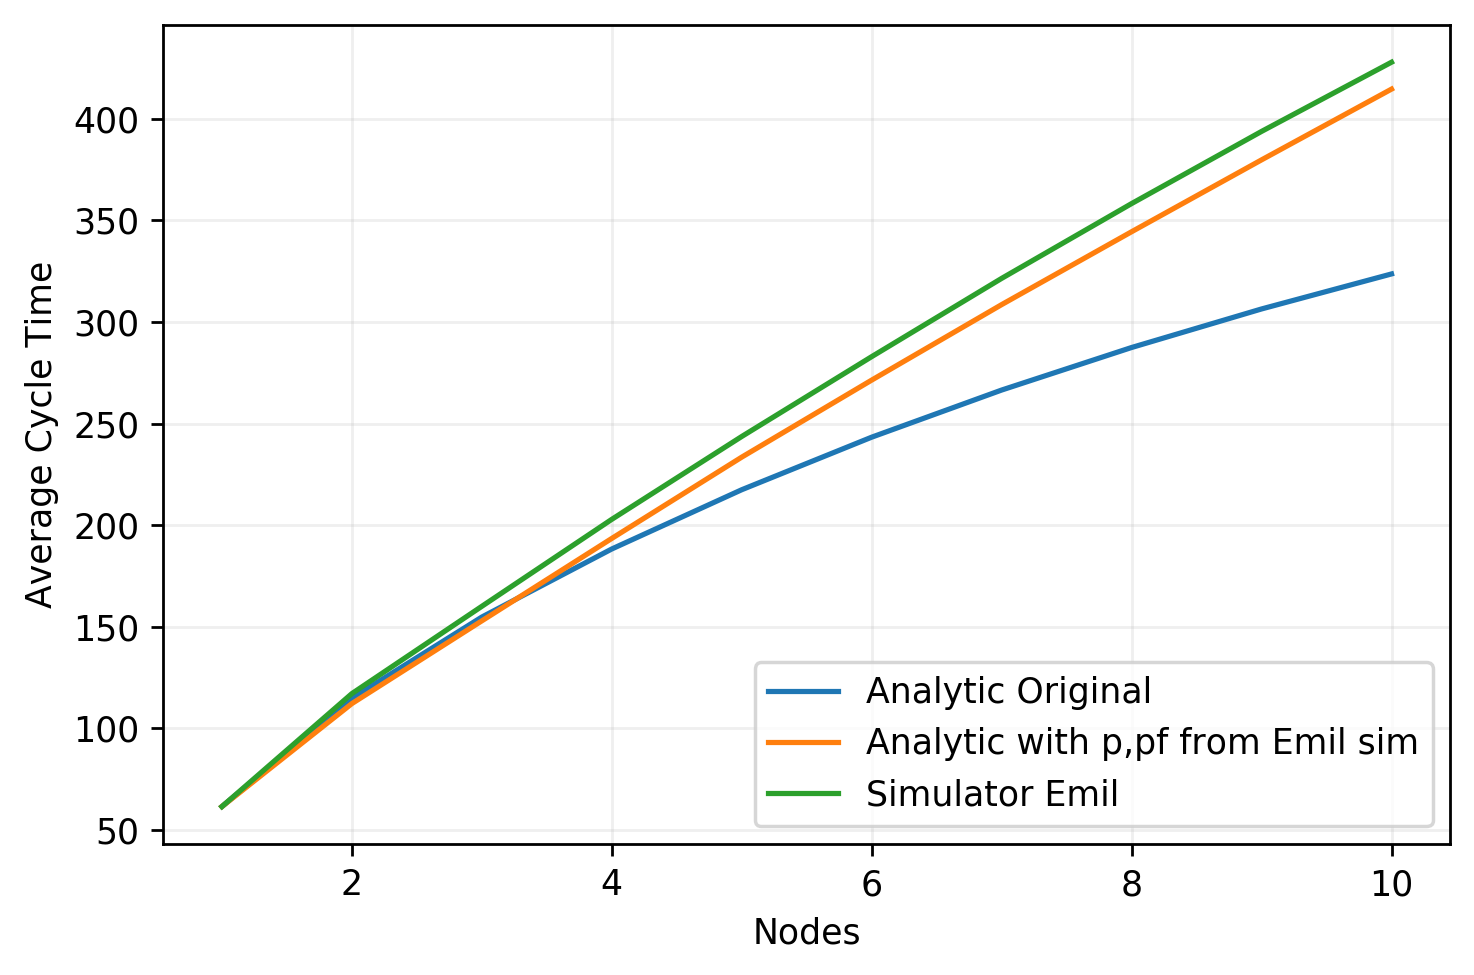

In [27]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), etc_orig, label='Analytic Original')
plt.plot(np.arange(1, nodes + 1), etc_sim1, label='Analytic with p,pf from Emil sim')
plt.plot(np.arange(1, nodes + 1), etc_sim, label='Simulator Emil')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=4)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('Average Cycle Time')
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

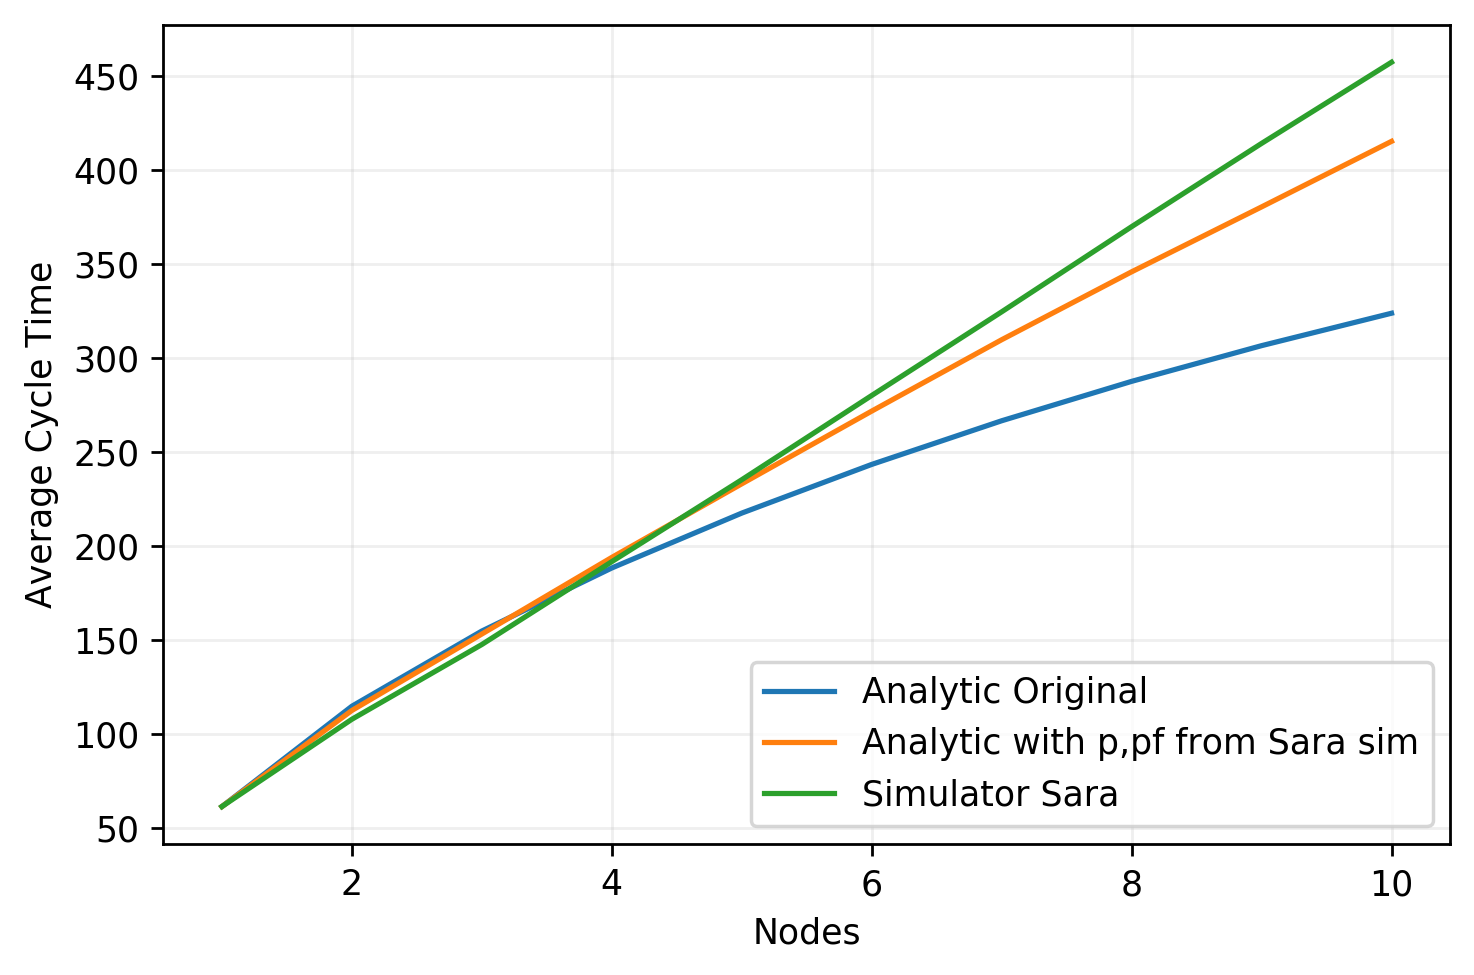

In [28]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), etc_orig, label='Analytic Original')
plt.plot(np.arange(1, nodes + 1), etc_sim2, label='Analytic with p,pf from Sara sim')
plt.plot(np.arange(1, nodes + 1), etc_sara, label='Simulator Sara')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=4)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('Average Cycle Time')
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

In [29]:
rts_tc_emil = []
rts_tc_sara = []

cts_tc_emil = []
cts_tc_sara = []

data_tc_emil = []
data_tc_sara = []

wait_tc_emil = []
wait_tc_sara = []

bo_tc_emil = []
bo_tc_sara = []

out_tc_emil = []
out_tc_sara = []

for i in range(nodes):
    rts_tc_emil.append(pi_rts(p_c_sim[i], p_f_sim[i]) * Etc(p_c_sim[i], p_f_sim[i]))
    rts_tc_sara.append(pi_rts(p_c_sara[i], p_f_sara[i]) * Etc(p_c_sara[i], p_f_sara[i]))
    
    cts_tc_emil.append(pi_cts(p_c_sim[i], p_f_sim[i]) * Etc(p_c_sim[i], p_f_sim[i]))
    cts_tc_sara.append(pi_cts(p_c_sara[i], p_f_sara[i]) * Etc(p_c_sara[i], p_f_sara[i]))
    
    data_tc_emil.append(pi_data(p_c_sim[i], p_f_sim[i]) * Etc(p_c_sim[i], p_f_sim[i]))
    data_tc_sara.append(pi_data(p_c_sara[i], p_f_sara[i]) * Etc(p_c_sara[i], p_f_sara[i]))
    
    wait_tc_emil.append(pi_wait(p_c_sim[i], p_f_sim[i]) * Etc(p_c_sim[i], p_f_sim[i]))
    wait_tc_sara.append(pi_wait(p_c_sara[i], p_f_sara[i]) * Etc(p_c_sara[i], p_f_sara[i]))
    
    bo_tc_emil.append(pi_bo(p_c_sim[i], p_f_sim[i]) * Etc(p_c_sim[i], p_f_sim[i]))
    bo_tc_sara.append(pi_bo(p_c_sara[i], p_f_sara[i]) * Etc(p_c_sara[i], p_f_sara[i]))
    
    out_tc_emil.append(pi_out(p_c_sim[i], p_f_sim[i]) * Etc(p_c_sim[i], p_f_sim[i]))
    out_tc_sara.append(pi_out(p_c_sara[i], p_f_sara[i]) * Etc(p_c_sara[i], p_f_sara[i]))

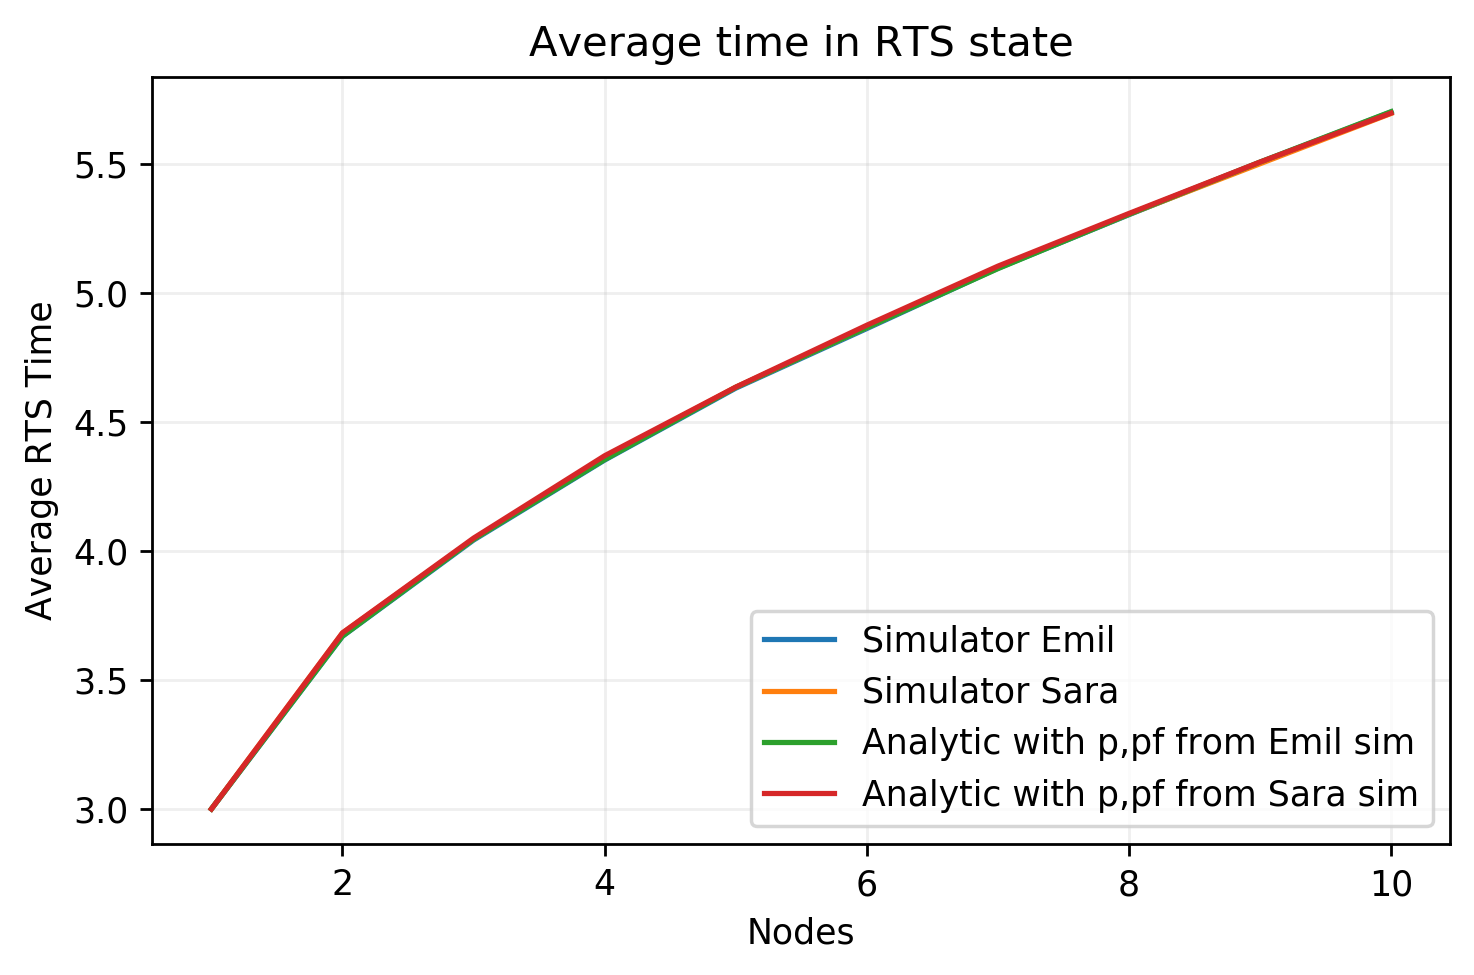

In [30]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), rts_sim, label='Simulator Emil')
plt.plot(np.arange(1, nodes + 1), rts_sara, label='Simulator Sara')
plt.plot(np.arange(1, nodes + 1), rts_tc_emil, label='Analytic with p,pf from Emil sim')
plt.plot(np.arange(1, nodes + 1), rts_tc_sara, label='Analytic with p,pf from Sara sim')
# plt.plot(np.arange(1, nodes + 1), etc_sara, label='Simulator Sara')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=4)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('Average RTS Time')
plt.title("Average time in RTS state")
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

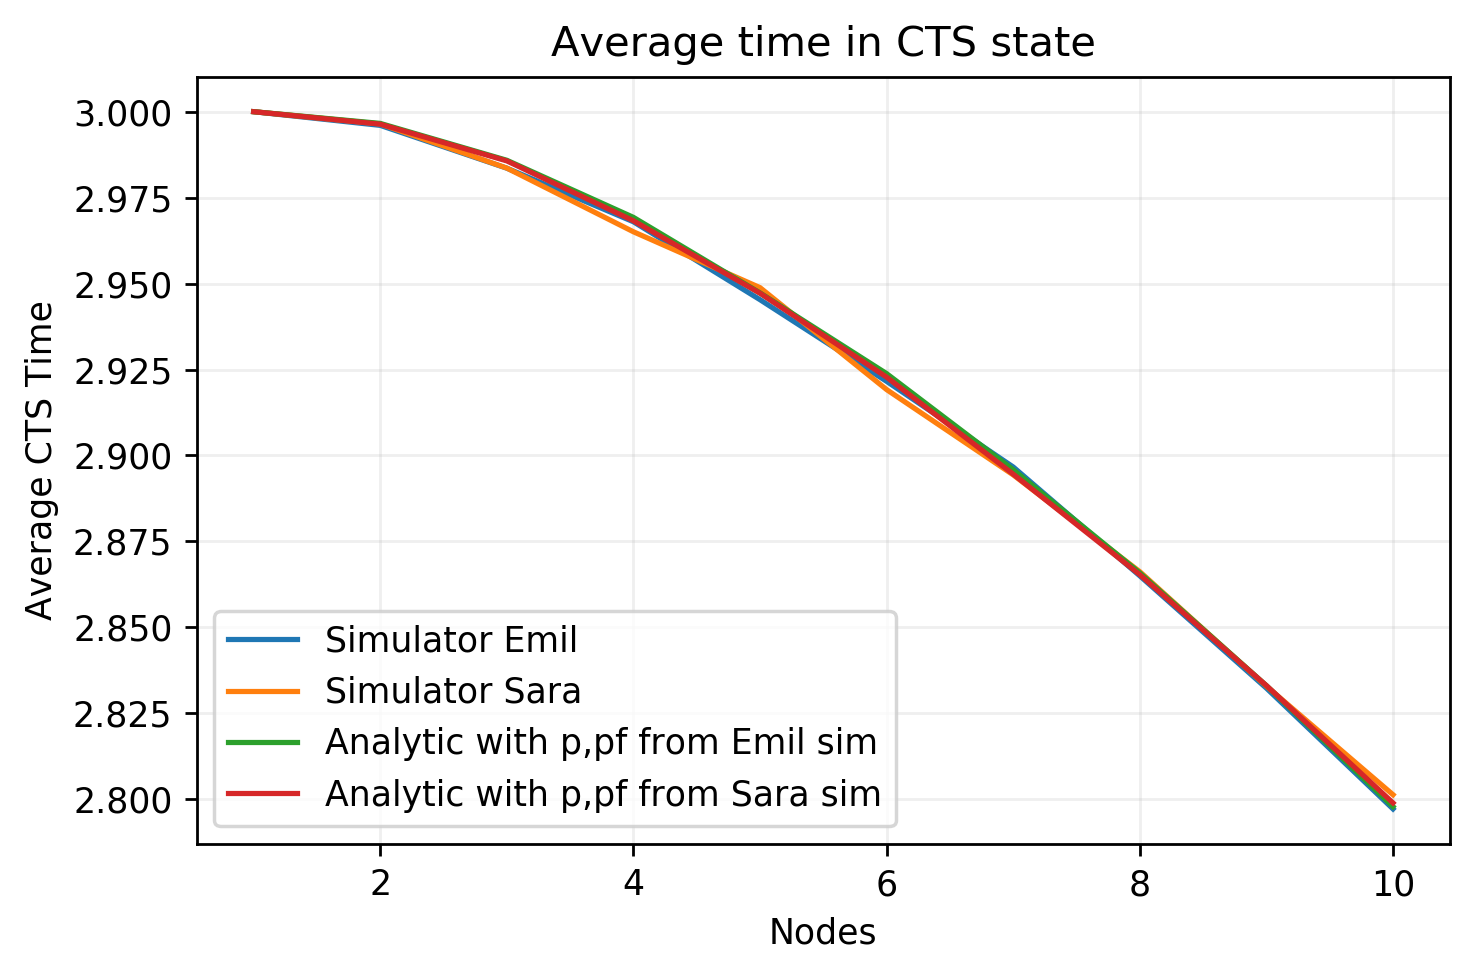

In [31]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), cts_sim, label='Simulator Emil')
plt.plot(np.arange(1, nodes + 1), cts_sara, label='Simulator Sara')
plt.plot(np.arange(1, nodes + 1), cts_tc_emil, label='Analytic with p,pf from Emil sim')
plt.plot(np.arange(1, nodes + 1), cts_tc_sara, label='Analytic with p,pf from Sara sim')
# plt.plot(np.arange(1, nodes + 1), etc_sara, label='Simulator Sara')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=3)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('Average CTS Time')
plt.title("Average time in CTS state")
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

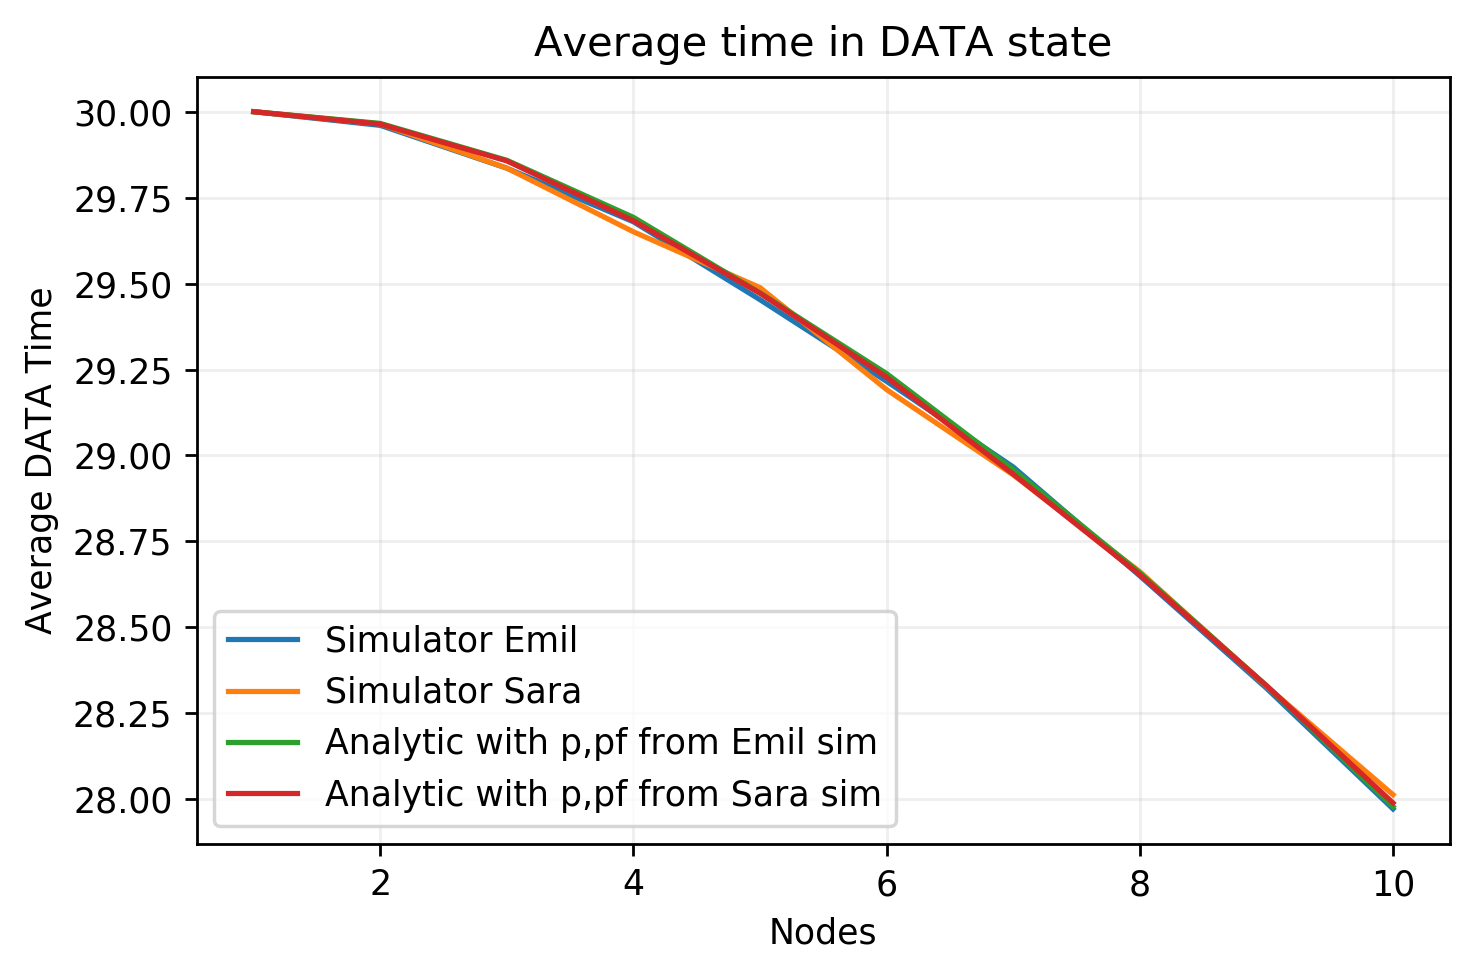

In [32]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), data_sim, label='Simulator Emil')
plt.plot(np.arange(1, nodes + 1), data_sara, label='Simulator Sara')
plt.plot(np.arange(1, nodes + 1), data_tc_emil, label='Analytic with p,pf from Emil sim')
plt.plot(np.arange(1, nodes + 1), data_tc_sara, label='Analytic with p,pf from Sara sim')
# plt.plot(np.arange(1, nodes + 1), etc_sara, label='Simulator Sara')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=3)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('Average DATA Time')
plt.title("Average time in DATA state")
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

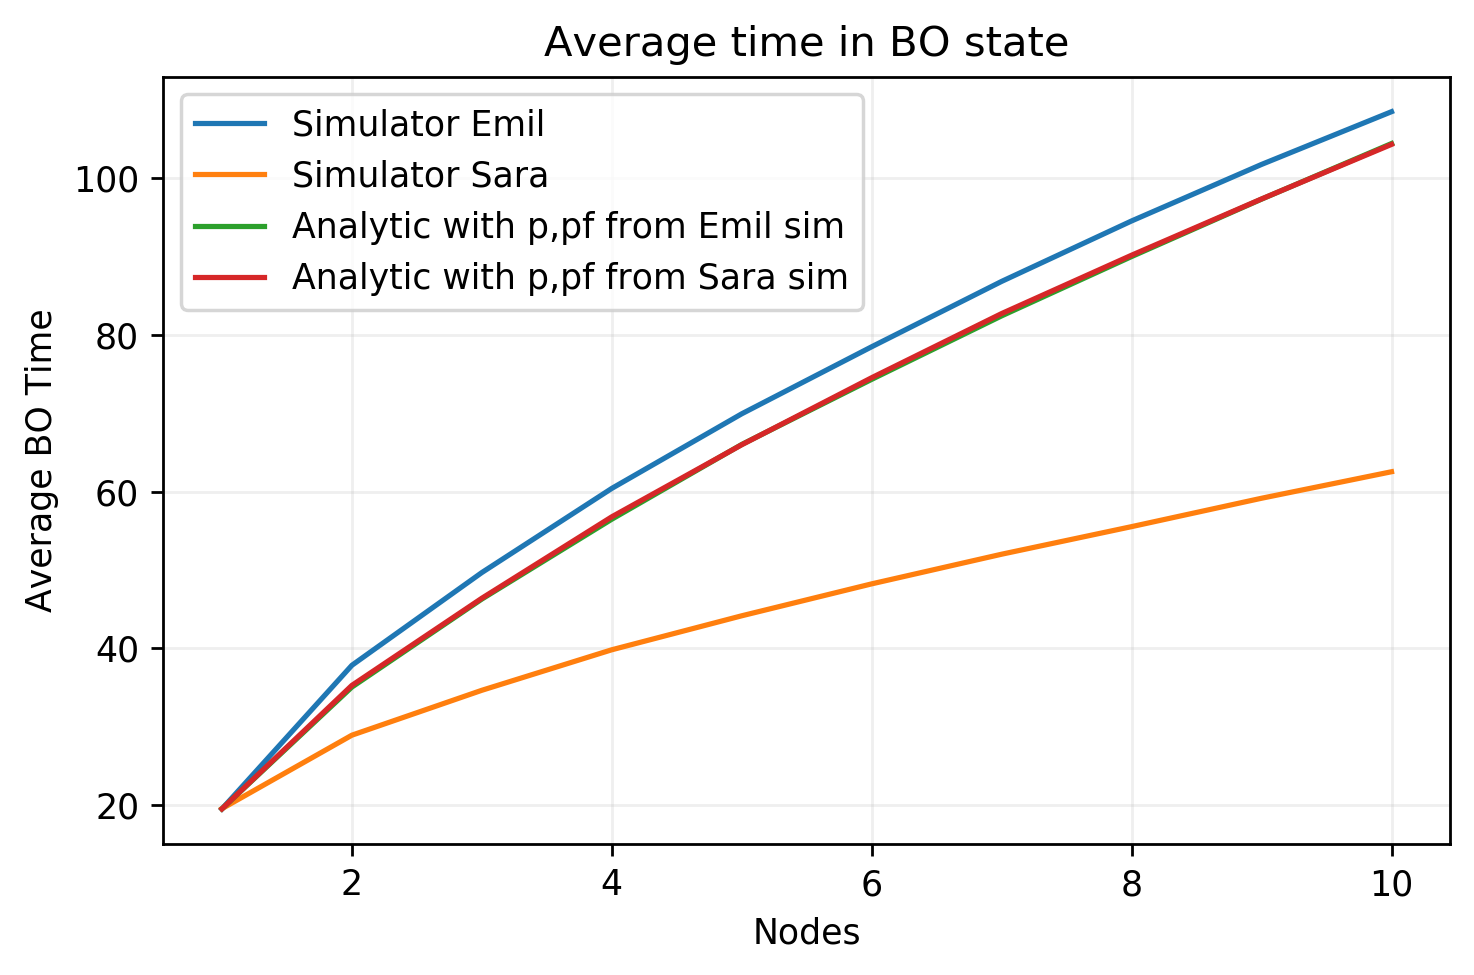

In [33]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), bo_sim, label='Simulator Emil')
plt.plot(np.arange(1, nodes + 1), bo_sara, label='Simulator Sara')
plt.plot(np.arange(1, nodes + 1), bo_tc_emil, label='Analytic with p,pf from Emil sim')
plt.plot(np.arange(1, nodes + 1), bo_tc_sara, label='Analytic with p,pf from Sara sim')
# plt.plot(np.arange(1, nodes + 1), etc_sara, label='Simulator Sara')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=2)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('Average BO Time')
plt.title("Average time in BO state")
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

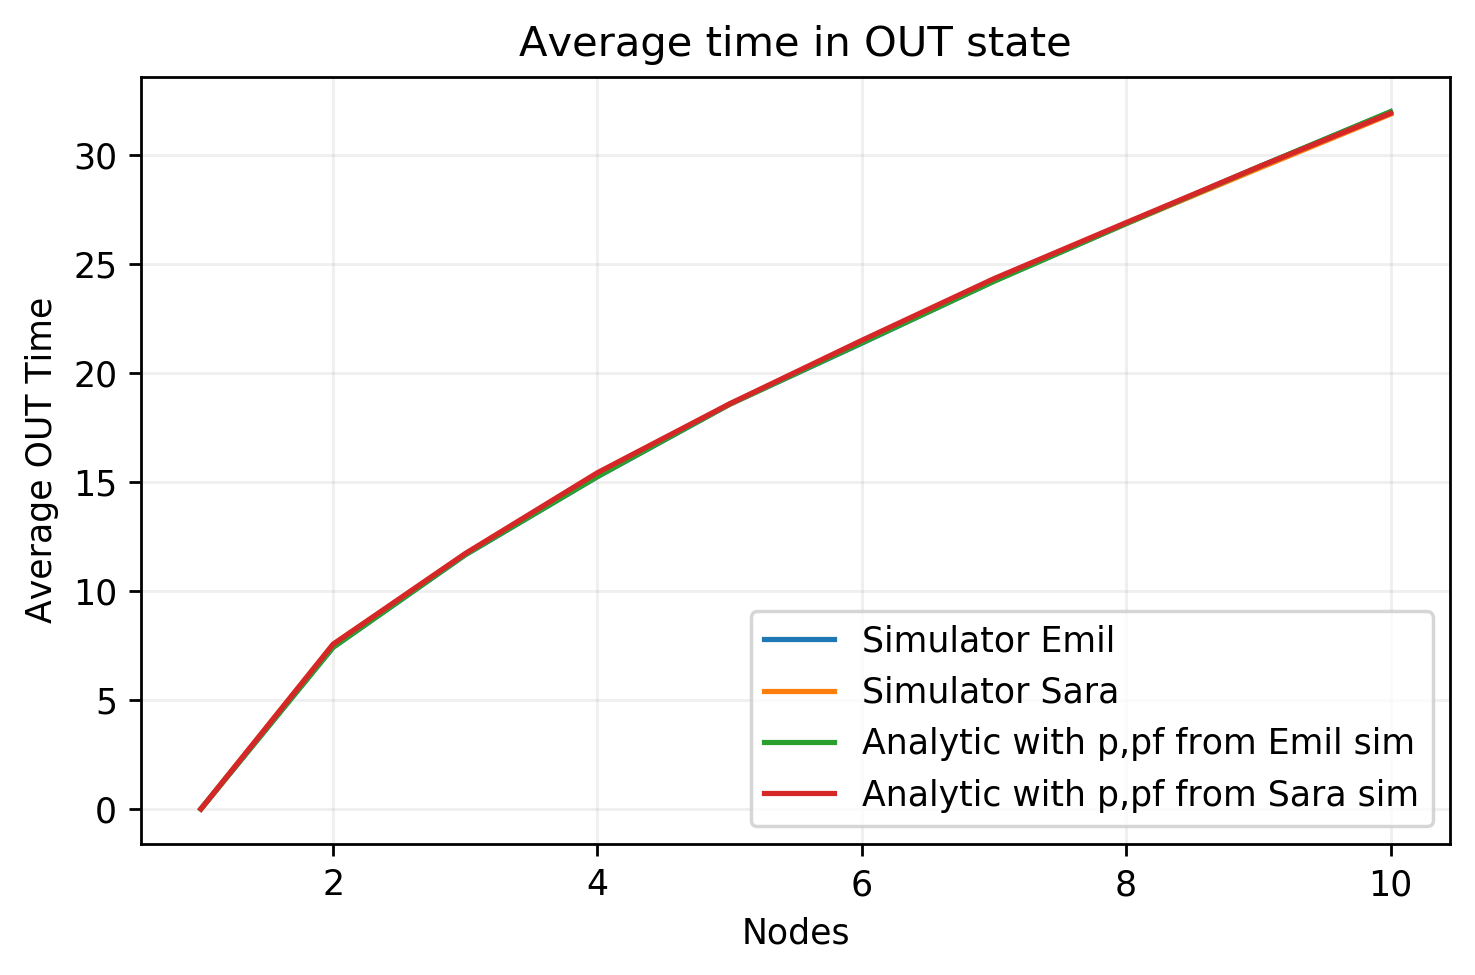

In [34]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), out_sim, label='Simulator Emil')
plt.plot(np.arange(1, nodes + 1), out_sara, label='Simulator Sara')
plt.plot(np.arange(1, nodes + 1), out_tc_emil, label='Analytic with p,pf from Emil sim')
plt.plot(np.arange(1, nodes + 1), out_tc_sara, label='Analytic with p,pf from Sara sim')
# plt.plot(np.arange(1, nodes + 1), etc_sara, label='Simulator Sara')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=4)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('Average OUT Time')
plt.title("Average time in OUT state")
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

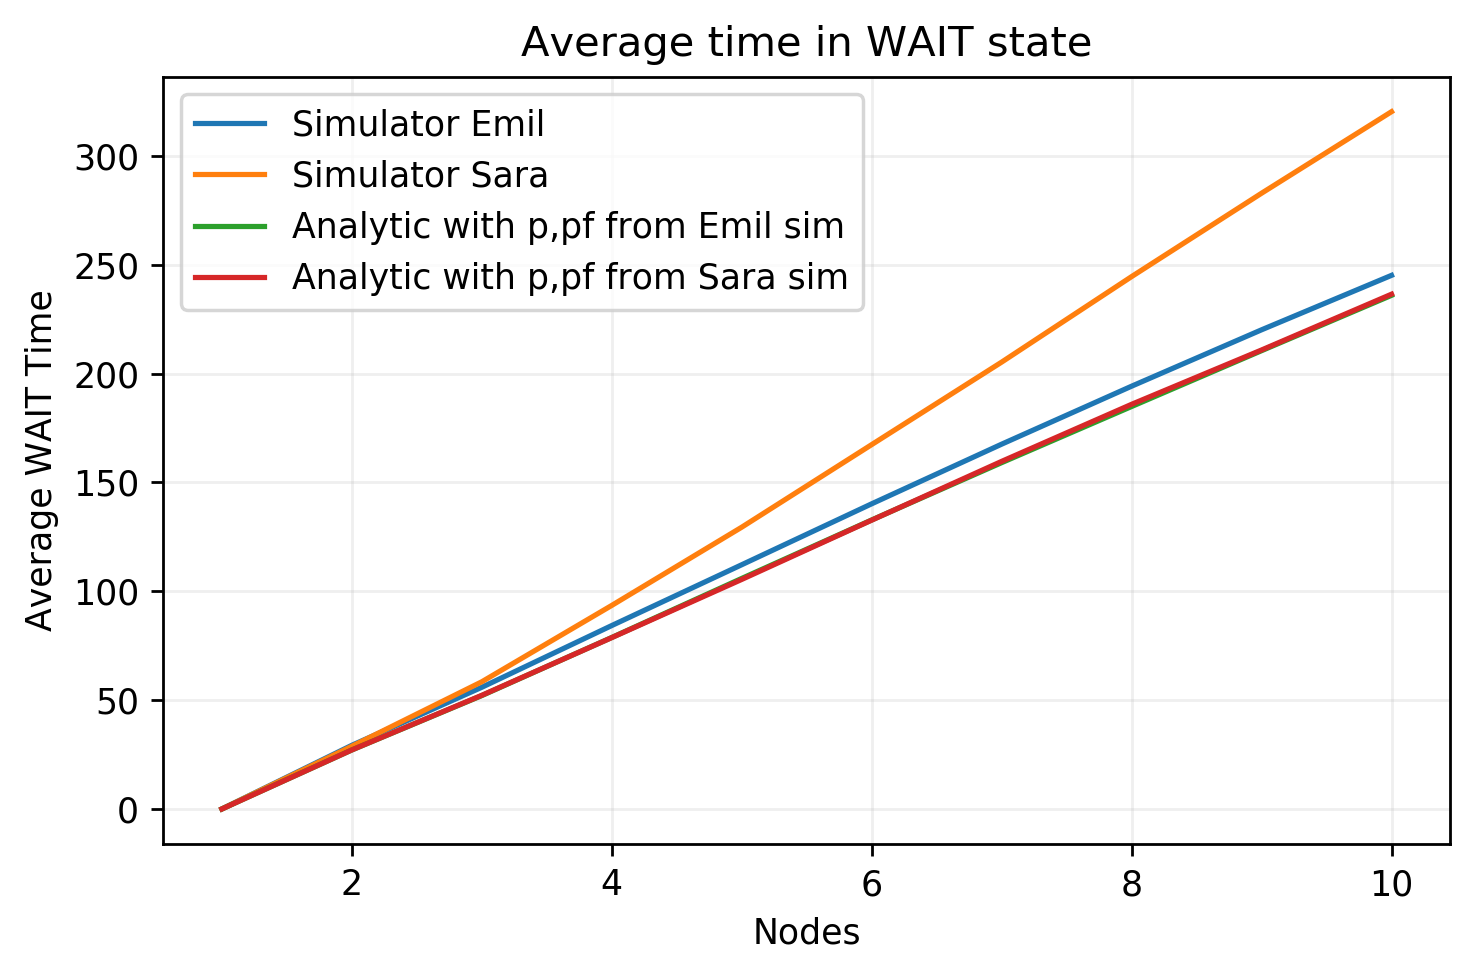

In [35]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), wait_sim, label='Simulator Emil')
plt.plot(np.arange(1, nodes + 1), wait_sara, label='Simulator Sara')
plt.plot(np.arange(1, nodes + 1), wait_tc_emil, label='Analytic with p,pf from Emil sim')
plt.plot(np.arange(1, nodes + 1), wait_tc_sara, label='Analytic with p,pf from Sara sim')
# plt.plot(np.arange(1, nodes + 1), etc_sara, label='Simulator Sara')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=2)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('Average WAIT Time')
plt.title("Average time in WAIT state")
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

In [ ]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), cts_tc_emil, label='Analytic Original')
plt.plot(np.arange(1, nodes + 1), cts_tc_sara, label='Analytic with p,pf from sim')
# plt.plot(np.arange(1, nodes + 1), etc_sara, label='Simulator Sara')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=4)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('Average Cycle Time')
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

In [ ]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), data_tc_emil, label='Analytic Original')
plt.plot(np.arange(1, nodes + 1), data_tc_sara, label='Analytic with p,pf from sim')
# plt.plot(np.arange(1, nodes + 1), etc_sara, label='Simulator Sara')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=4)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('Average Cycle Time')
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

In [ ]:
plt.figure(dpi=250)
plt.plot(np.arange(1, nodes + 1), bo_tc_emil, label='Analytic Original')
plt.plot(np.arange(1, nodes + 1), bo_tc_sara, label='Analytic with p,pf from sim')
# plt.plot(np.arange(1, nodes + 1), etc_sara, label='Simulator Sara')
plt.legend(bbox_to_anchor=(1.05, 1, 0.35, 0), loc=2, ncol=1, mode="expand", borderaxespad=0)
plt.legend(loc=4)
plt.grid(alpha=0.2)
plt.xlabel('Nodes')
plt.ylabel('Average Cycle Time')
plt.tight_layout()
# plt.savefig('tests.png', dpi=600)
plt.show()

In [193]:
simpc = 0.6501868717116485
simpf = 0.7637926384460918

In [194]:
Etc(simpc, simpf)

147.28703415101543

In [195]:
pi_rts(simpc, simpf) * Etc(simpc, simpf)

3.0

In [196]:
pi_bo(simpc, simpf) * Etc(simpc, simpf) #, pi_bo2(simpc, simpf) * Etc(simpc, simpf)

29.80245162866252

In [197]:
pi_cts(simpc, simpf) * Etc(simpc, simpf)

1.0494393848650545

In [198]:
pi_data(simpc, simpf) * Etc(simpc, simpf)

10.494393848650546

In [199]:
pi_ack(simpc, simpf) * Etc(simpc, simpf)

1.0494393848650545

In [200]:
pi_out(simpc, simpf) * Etc(simpc, simpf)

21.4561667664844

In [201]:
pi_wait(simpc, simpf) * Etc(simpc, simpf)

77.43514313748781

In [202]:
pi_idle(simpc, simpf) * Etc(simpc, simpf)

3.0

In [121]:
t1 = pi_idle(simpc, simpf) + pi_bo(simpc, simpf) + pi_rts(simpc, simpf)
t2 = pi_cts(simpc, simpf) + pi_data(simpc, simpf) + pi_ack(simpc, simpf)
t3 = pi_out(simpc, simpf) + pi_wait(simpc, simpf)
t1 + t2 + t3

1.0